In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Laad de dataset
df = pd.read_csv('obesity_level.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
# Stap 1: Controle op missende waarden
missing_values = df.isnull().sum()
print("Aantal missende waarden per kolom:\n", missing_values)

Aantal missende waarden per kolom:
 id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64


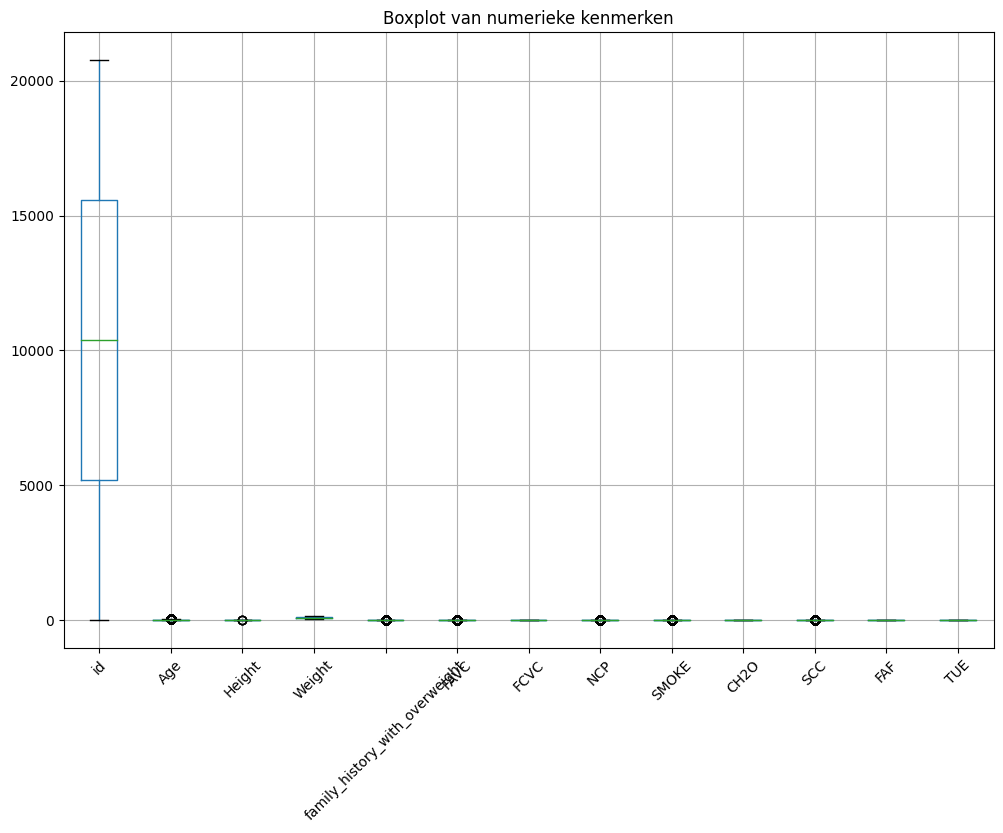

In [3]:
# Stap 2: Verkenning van variabelen (numerieke verdeling en uitschieters)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].describe()

# Boxplot voor numerieke kolommen om uitschieters te identificeren
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Boxplot van numerieke kenmerken")
plt.show()

In [4]:
# Stap 3: Categorische waarden evalueren (verdeling van categorische kolommen)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Verdeling van {col}:\n", df[col].value_counts(), "\n")

Verdeling van Gender:
 Gender
Female    10422
Male      10336
Name: count, dtype: int64 

Verdeling van CAEC:
 CAEC
Sometimes     17529
Frequently     2472
Always          478
0               279
Name: count, dtype: int64 

Verdeling van CALC:
 CALC
Sometimes     15066
0              5163
Frequently      529
Name: count, dtype: int64 

Verdeling van MTRANS:
 MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64 

Verdeling van 0be1dad:
 0be1dad
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64 



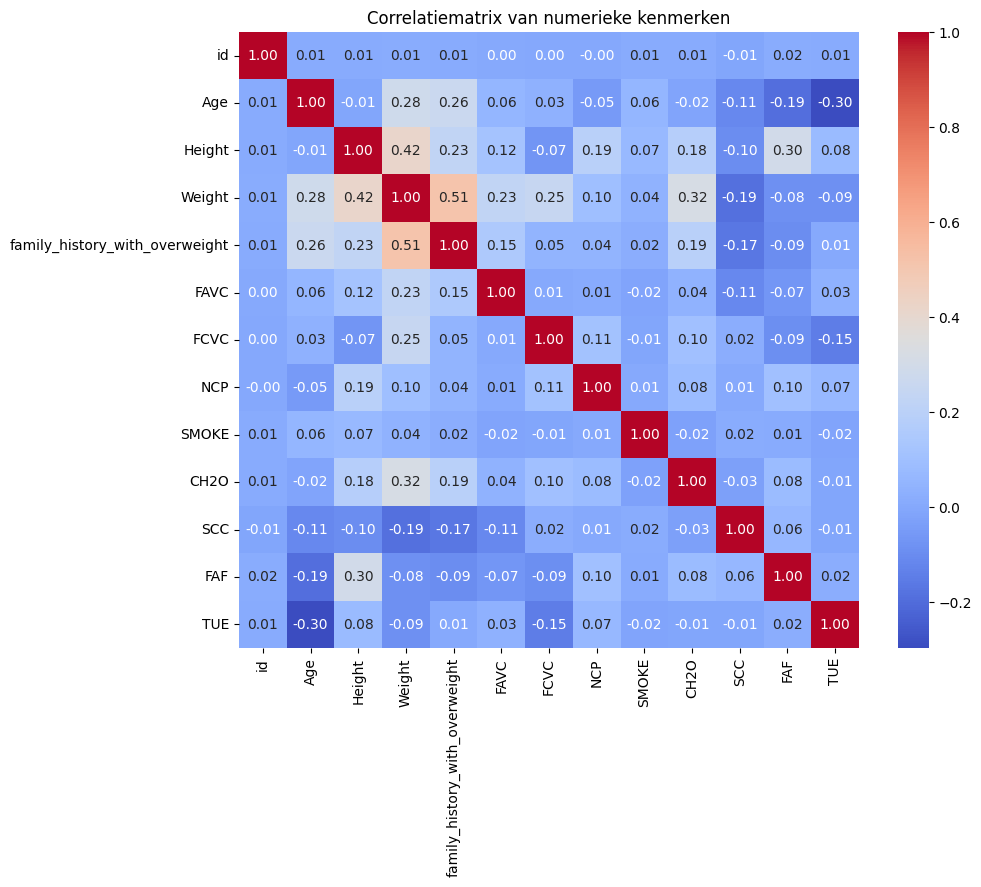

In [5]:
# Stap 4: Correlatie tussen numerieke variabelen
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlatiematrix van numerieke kenmerken")
plt.show()

In [6]:
missing_values = df.isnull().sum()
print("Aantal missende waarden per kolom:\n", missing_values)

Aantal missende waarden per kolom:
 id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64


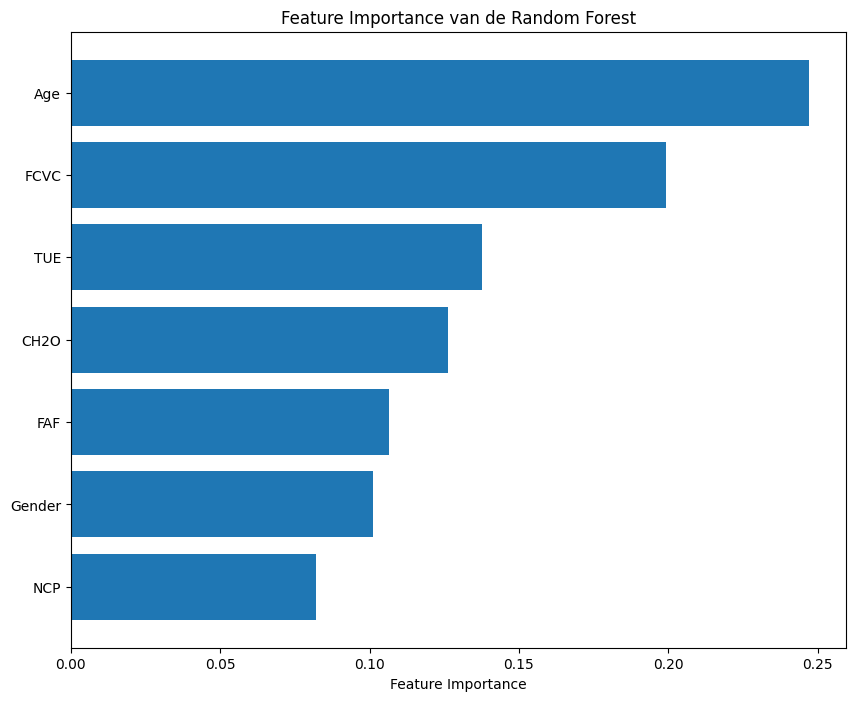

Accuracy van het model: 0.6953275529865125

Classificatie Rapport:
                      precision    recall  f1-score   support

       0rmal_Weight       0.55      0.71      0.62       626
Insufficient_Weight       0.66      0.67      0.67       524
     Obesity_Type_I       0.59      0.59      0.59       543
    Obesity_Type_II       0.87      0.91      0.89       657
   Obesity_Type_III       0.97      0.99      0.98       804
 Overweight_Level_I       0.47      0.36      0.40       484
Overweight_Level_II       0.51      0.39      0.45       514

           accuracy                           0.70      4152
          macro avg       0.66      0.66      0.66      4152
       weighted avg       0.69      0.70      0.69      4152



['random_forest_model.pkl']

In [7]:
import joblib

# Verwijder kolom 'id' omdat het geen relevante informatie bevat voor voorspellingen
# Verwijder weight en height (bmi)... te grote bias
# ...En de rest ook na bekijken van feature importance
df_cleaned = df.drop(['id', 'Weight', 'Height', 'family_history_with_overweight', 'CAEC', 'CALC', 'MTRANS', 'FAVC', 'SCC', 'SMOKE'], axis=1, errors='ignore')

# Definieer features (X) en doelvariabele (y)
X = df_cleaned.drop(['0be1dad'], axis=1)
y = df_cleaned['0be1dad']

# Encodeer categorische variabelen met LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Splits de data in train en test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiseer en train het Random Forest model
model = RandomForestClassifier(
    n_estimators=300,            # Aantal bomen
    min_samples_split=10,        # Minimum aantal samples om een interne node te splitsen
    min_samples_leaf=2,          # Minimum aantal samples in een blad-node
    max_depth=20,                # Maximale diepte van de bomen
    bootstrap=True,             # Geen gebruik van bootstrap-samples
    random_state=42              # Voor reproduceerbaarheid
)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xlabel("Feature Importance")
plt.title("Feature Importance van de Random Forest")
plt.show()

# Voorspellingen maken op de test set
y_pred = model.predict(X_test)

# Model evalueren
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy van het model:", accuracy)
print("\nClassificatie Rapport:\n", classification_rep)

# Model opslaan
joblib.dump(model, 'random_forest_model.pkl')

In [8]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np
# from sklearn.metrics import accuracy_score, classification_report

# # Uitgebreidere hyperparameter ruimte
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],  # groter bereik voor aantal bomen
#     'max_depth': [None, 10, 20, 30, 40, 50, 60, 70],  # hogere max_depth waarden toegevoegd
#     'min_samples_split': [2, 5, 10, 15, 20],          # uitgebreidere reeks voor min_samples_split
#     'min_samples_leaf': [1, 2, 4, 6, 8],              # meer opties voor min_samples_leaf
#     'bootstrap': [True, False],                       # gebruik bootstrap samples of niet
#     'max_features': ['auto', 'sqrt', 'log2', None],   # aantal features per split verkennen
#     'class_weight': [None, 'balanced', 'balanced_subsample']  # balanceer klassen als dat nodig is
# }

# # Initialiseer het Random Forest model
# rf = RandomForestClassifier(random_state=42)

# # Initialiseer RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf, 
#     param_distributions=param_dist,
#     n_iter=100,  # verhoogd aantal iteraties
#     cv=3, 
#     verbose=2, 
#     random_state=42, 
#     n_jobs=-1
# )

# # Fit de RandomizedSearchCV op de trainingsdata
# random_search.fit(X_train, y_train)

# # Print de beste parameters gevonden door RandomizedSearchCV
# print("Beste hyperparameters:", random_search.best_params_)

# # Train het beste model op de volledige trainingsdata
# best_model = random_search.best_estimator_

# # Voorspellingen maken op de test set met het beste model
# y_pred = best_model.predict(X_test)

# # Model evalueren
# accuracy = accuracy_score(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# print("Accuracy van het beste model:", accuracy)
# print("\nClassificatie Rapport van het beste model:\n", classification_rep)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c00fe19b-4ff0-4f57-9aa3-f9a872fb4d9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>